# Домашнє завдання: Статистичні візуалізації з Seaborn

## Опис завдання
У цьому домашньому завданні ви будете використовувати бібліотеку Seaborn для створення красивих статистичних візуалізацій. Seaborn має кращий стандартний стиль та спеціалізується на статистичних графіках.

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - як відчувається температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates


# Завантаження даних
df = pd.read_csv('../data/yulu_rental.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Встановлюємо стиль seaborn
sns.set_theme(style="whitegrid")

# Додамо додаткові колонки для аналізу
df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday
df['weekday'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour


---

## Завдання 1: Лінійний графік з довірчими інтервалами

**Завдання:**
Побудуйте лінійний графік середньої кількості оренд помісячно з довірчими інтервалами (confidence intervals) рівними 1 стандартному відхиленню.

**УВАГА!** В лекції ми будували подібний графік, але там були дані по номеру місяця, а тут треба зобразити дані в розрізі місяць_рік.

В якості підказки вам наведений код для створення колонки, яка містить `місяць_рік`. Як її використати - вже питання до вас :)

Очікуваний результат:
![](https://drive.google.com/uc?id=1uVKqfY1VlhVMaM3wu99uVGT1f7S0Vf8S)

**Питання для інтерпретації:**
- В які місяці найбільша невизначеність в даних?

In [2]:
month_names_ua = {
    1: 'Січ', 2: 'Лют', 3: 'Бер', 4: 'Кві', 5: 'Тра', 6: 'Чер',
    7: 'Лип', 8: 'Сер', 9: 'Вер', 10: 'Жов', 11: 'Лис', 12: 'Гру'
}

In [3]:
df['month_year'] = df.index.to_period('M')
df['month_year']  = df['month_year'].apply(lambda x: f"{month_names_ua[x.month]} {x.year}")

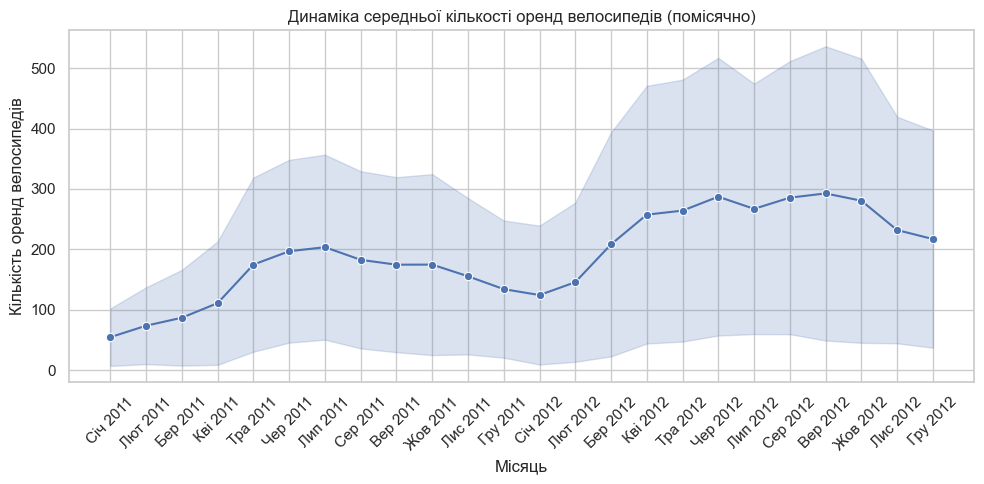

In [4]:
plt.figure(figsize=(10, 5))

sns.lineplot(df, x='month_year', y='count', errorbar='sd', marker='o')

plt.title('Динаміка середньої кількості оренд велосипедів (помісячно)')
plt.xlabel('Місяць')
plt.ylabel('Кількість оренд велосипедів')
plt.xticks(rotation=45)
plt.tight_layout();

В 2012 році розкид даних, і відповідно невизначеність, вище, ніж в 2011. Найбільша невизначенясть в квітні, червні, вересні та жовтні 2012 року.

## Завдання 2: Порівняння стилів - Pandas vs Seaborn гістограма

**Завдання:**
Побудуйте гістограму розподілу температури двома способами - з Pandas та Seaborn - та порівняйте візуальний вигляд. Задайте однакову кількість бінів в цих візуалізаціях, відмінну від стандартної. В візуалізації Seaborn додайте параметр при побудові `kde=True`.

**Функція Seaborn: `sns.histplot()`**

Можна побудувати окремо два графіки. Але для тих, хто хоче складніше - побудуйте ці 2 графіки на 1 фігурі.

**Дайте відповідь на питання:**
1. Яка візуальна різниця між Pandas та Seaborn гістограмами?
2. Що за лінія додаткова на графіку в Seaborn? Як вона називається і як ви б її описали своїми словами?

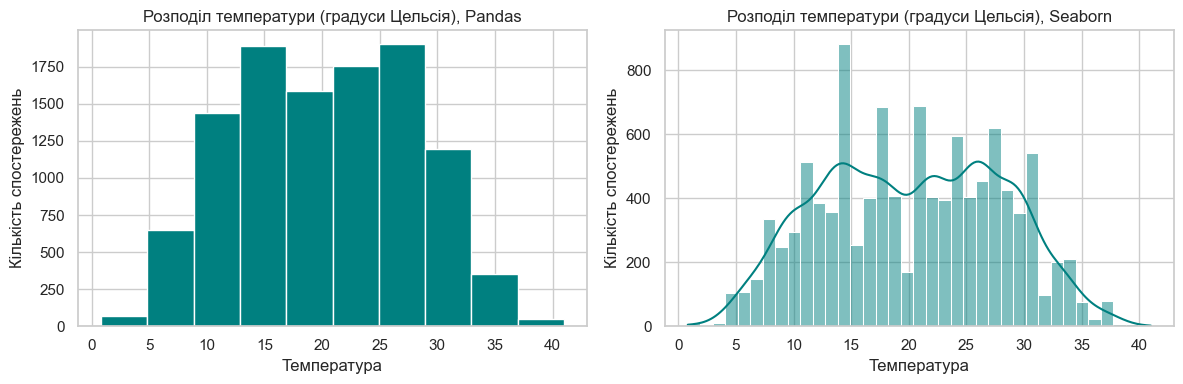

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].hist(df['temp'], color = 'teal')
ax[0].set_title('Розподіл температури (градуси Цельсія), Pandas')
ax[0].set_xlabel('Температура')
ax[0].set_ylabel('Кількість спостережень')

sns.histplot(df['temp'], color='teal', ax=ax[1], kde=True)
ax[1].set_title('Розподіл температури (градуси Цельсія), Seaborn')
ax[1].set_xlabel('Температура')
ax[1].set_ylabel('Кількість спостережень')

plt.tight_layout()
plt.show()


**Віповіді на питання:**

1) Графік побудований за допомогою Pandas має меньшу кількість бінів. Також має менше параметрів для налаштування. Графік побудований з Seaborn має більшу кількість бінів і багато додаткових налаштувань, зокрема kde (Kernel Density Estimation) - лінія щільності розподілу. 

2) Kernel Density Estimation - це згладжена функція розподілу. Завдяки цій лінії видно, що розподіл є бімодальним - найчастіша температура близько 15 та близько 26 градусів. Межі даних це 0 та 40 градусів - температура нижче 5 градусів або вище 35 буває доволі рідко.

## Завдання 3: Box Plot порівняння - Pandas vs Seaborn

**Завдання:**
Побудуйте box plot для кількості погодинних оренд велосипедів за погодними умовами з Pandas та Seaborn.

**Функція Seaborn: `sns.boxplot()`**

Можна побудувати окремо два графіки. Але для тих, хто хоче складніше - побудуйте ці 2 графіки на 1 фігурі.

Просунуте доповнення:
- підпишіть погодні умови їх інтерпретацією з опису даних в обох графіках

**Дайте відповідь на питання:**
- Яка візуальна різниця між Pandas та Seaborn бокс-плотами?

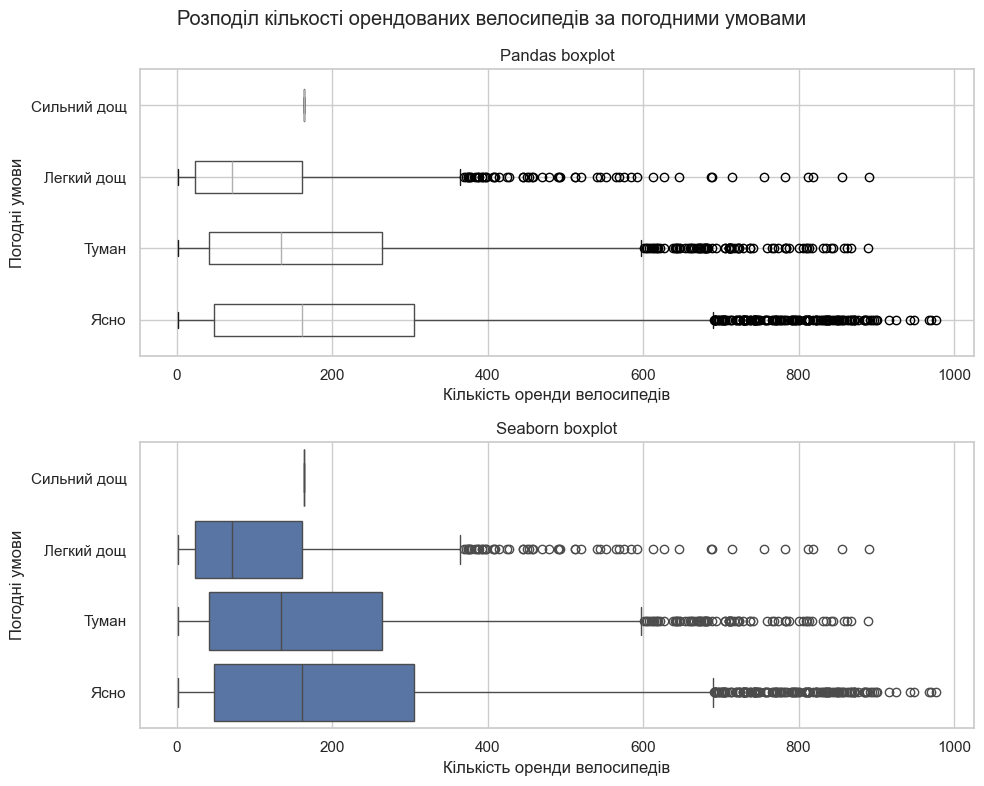

In [6]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

df[['weather', 'count']].boxplot(
    figsize = (10, 6), 
    by = 'weather',
    xlabel = 'Кількість оренди велосипедів',
    ylabel = 'Погодні умови',
    vert = False,
    ax=ax[0]
)
ax[0].set_yticks(range(1, 5),['Ясно', 'Туман', 'Легкий дощ', 'Сильний дощ'])
ax[0].set_title('Pandas boxplot')


sns.boxplot(df, x='count', y='weather', ax=ax[1], orient='h')
ax[1].set_title('Seaborn boxplot')
ax[1].set_xlabel('Кількість оренди велосипедів')
ax[1].set_ylabel('Погодні умови')
ax[1].set_yticks(range(0, 4),['Ясно', 'Туман', 'Легкий дощ', 'Сильний дощ'])
ax[1].invert_yaxis() 

plt.suptitle('Розподіл кількості орендованих велосипедів за погодними умовами')
plt.tight_layout()
plt.show()

Pandas boxplot - класичний чорно-білий графік, має менше візуальних ефектів. По замовчуванню по осі Y погодні умови розподілені за зростанням знизу вверх, як відмітки на класичній осі.

Seaborn boxplot має кольорове забарвлення, що більше підходить для інтерпретацій, має більш "товсті" ящики і сірий або напівпрозорий колір для викидів. Сортування категорій в Seaborn іде в оерненому порядку, тому для синхронізації графіків довелось використати інверсію по осі Y.
З цікавого - прив'язка підписів в Seaborn іде за іншими індексами.

<!-- - -->
## Завдання 4: Heatmap кореляційної матриці

**Завдання:**
Створіть із Seaborn кореляційну матрицю з забарвленням heatmap (колір відповідає величині значення в клітинці) числових змінних в наших даних з анотаціями значень.

**Дайте відповіді на питання по графіку:**
1. Які змінні найсильніше корелюють з загальною кількістю оренди (count)?
2. Яка кореляція між temp та atemp? Чому?
3. Які змінні мають негативну кореляцію?


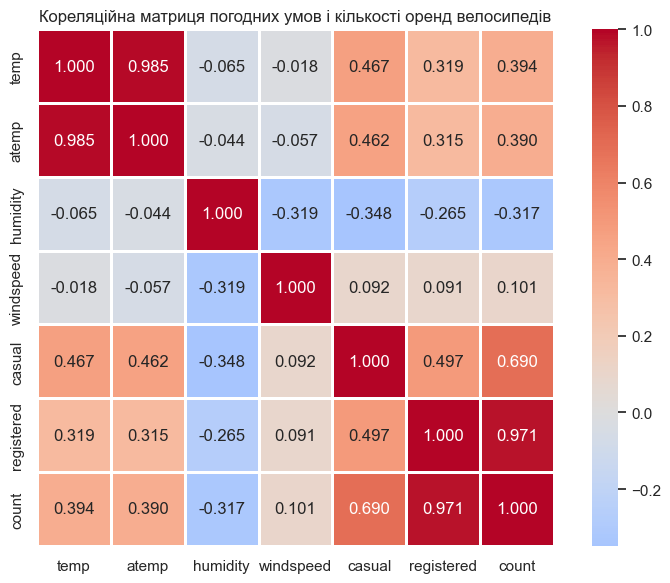

In [7]:
correlation = df[['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']].corr()

plt.figure(figsize=(8, 6))

sns.heatmap(
    correlation,
    annot = True,
    cmap = 'coolwarm',
    fmt = '.3f',
    center = 0,
    square = True,
    linewidths = 1
)

plt.title('Кореляційна матриця погодних умов і кількості оренд велосипедів')
plt.tight_layout()
plt.show()

Найсильніша кореляція з загальною кількістю оренди `count` у змінної `registered`, тобто збільшення динаміка кількості орендованих велосипедів визначається динамікою оренди зареєстрованими користувачами. Зв'язок з динамікою оренди випадковими користувачами `casual` є сильним, проте нижчим ніж у зареєстрованих. Також помірним та позитивним є зв'язок з температурою `temp` / `atemp` тобто підвищення температури позитивно впливає на збільшення кількості оренд велосипедів причому більший вплив на випадкових користувачів.

Кореляція між показниками `temp` та `atemp` є дуже сильною, що цілком логічно - відчутна температура базується на фактичній температурі.
Це практично одна й та сама змінна з корекцією на вологість та швидкість вітру.

Негативну помірну кореляцію мають вологість `humidity` і кількість оренд випадковими користувачами `casual`, тобто з підвищенням вологості випадкові користувачі менш схильні до оренди велосипедів. Для зареєстрованих користувачів `registered` кореляція також є негативною, але слабкою. Також помірну негативну кореляцію має вологість `humidity` та швидкість вітру `windspeed`, тобто зазвичай ці показники змінюються в різних напрямках.

## Завдання 5: Violin Plot для глибокого аналізу розподілів

**Завдання:**
Створіть violin plot для аналізу розподілу оренди за сезонами.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Що показує "товщина" violin plot?
2. В якому сезоні найбільша варіабельність оренди?
3. Яка перевага violin plot над звичайним box plot?


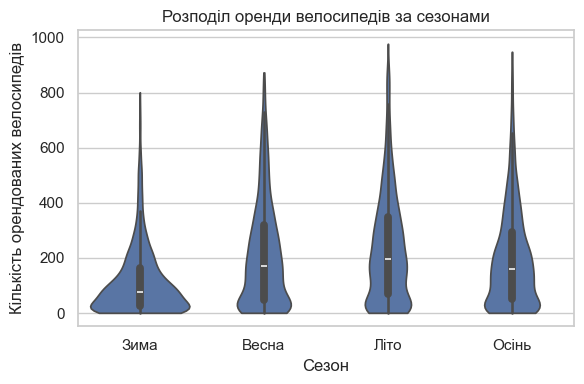

In [8]:
plt.figure(figsize=(6, 4))

sns.violinplot(df, x = df['season'], y = df['count'], cut = 0)

plt.xticks(range(4), ['Зима', 'Весна', 'Літо', 'Осінь'])
plt.title('Розподіл оренди велосипедів за сезонами')
plt.xlabel('Сезон')
plt.ylabel('Кількість орендованих велосипедів')

plt.tight_layout()
plt.show()

Violin plot використовує kde для відображення кривої щільності. Так як функція відображає згладжений розподіл, то 'хвіст' може виходити за межі реальних даних. Використала cut=0 так як кількість оренд не може бути менше 0. Так графік менш привабливий, зате більш відповідає даним.

1) Відповідно, так як використовується kde, "товщина" показує щільність розподілу - чим товще графік, тим більше спостережень у цьому діапазоні. Як видно з графіку взимку найчасті орендують близько 50 велосипедів на годину, а кількість більше 200 є діже рідккою ситуацією.

2) Найбільша варіабельність оренди влітку, це демонструє найбільша довжина графіку - розмах значень від 0 до 1000 на годину

3) Перевага violin plot над boxplot це відображення форми розподілу, що надає більше уявлення про дані, можливість виявити моду, або навіть декілька

## Завдання 6: Pairplot для мультиваріативного аналізу

**Завдання:**
Створіть pairplot для аналізу взаємозв'язків між ключовими змінними `'temp', 'humidity', 'windspeed', 'count'` . В якості візуальної розбивки за категоріями (параметр `hue`) додайте сезон.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Між якими змінними спостерігається найсильніший лінійний зв'язок?
2. Яка характеристика найбільше змінюється від сезону?

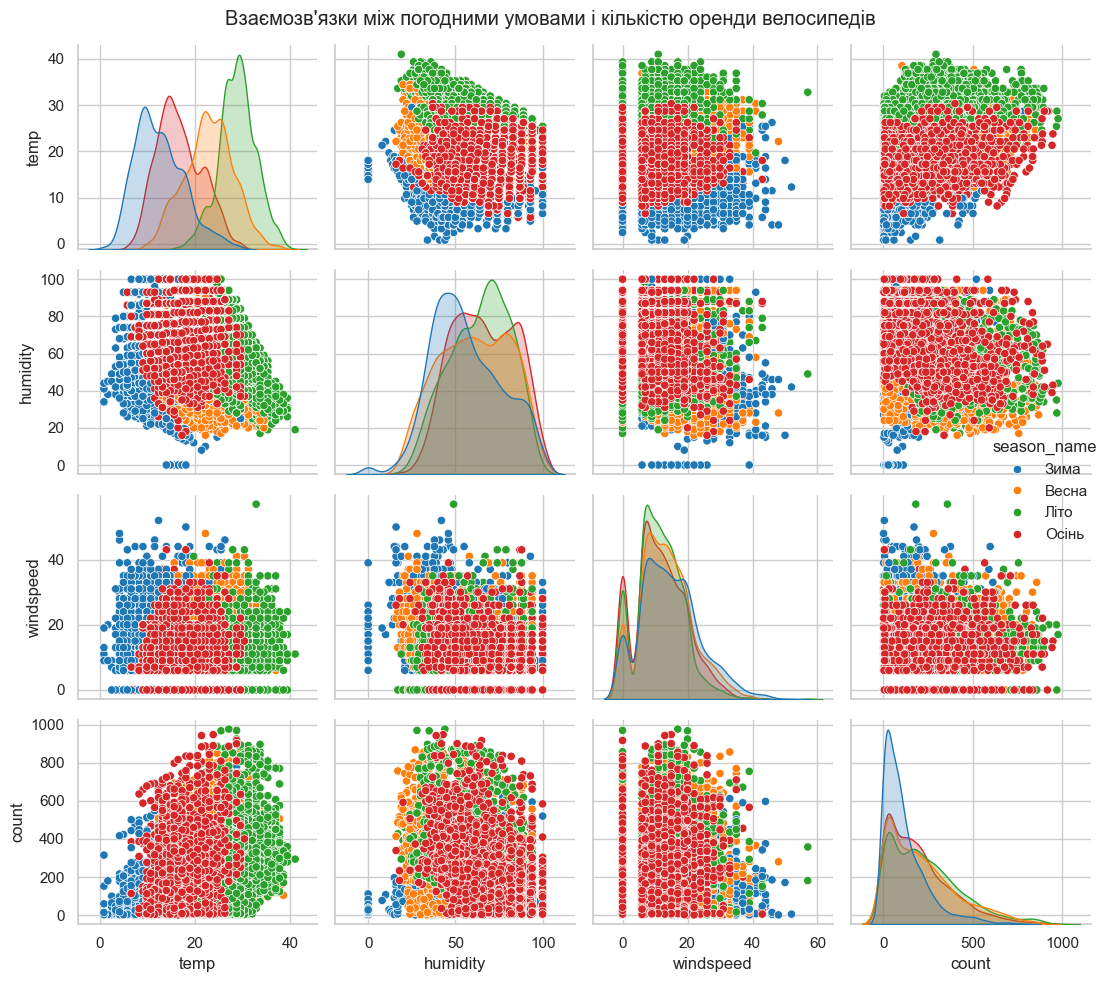

In [9]:
df['season_name'] = df['season'].map({1: 'Зима', 2: 'Весна', 3: 'Літо', 4: 'Осінь'})

sns.pairplot(
    data = df,
    vars = ['temp', 'humidity', 'windspeed', 'count'],
    hue = 'season_name',
    palette = 'tab10'
)

plt.suptitle('Взаємозв\'язки між погодними умовами і кількістю оренди велосипедів')
plt.tight_layout()
plt.show()

1) Найсильніший лінійний зв'язок між температурою `temp` та кількістю оренд `count`.
2) Залежно від сезону найбільше змінюється температура `temp`. Також бачимо, що для кількості оренд `count` взимку розподіл сильно зміщений до лівого краю, тобто найчастіше кількість оренд є невисокою. Для інших сезонів розподіл кількості оренд є схожим.

## Завдання 7: Joint Plot для детального аналізу двох змінних

**Завдання:**
Проаналізуйте залежність між температурою та орендою за допомогою joint plot. В якості візуальної розбивки за категоріями (параметр `hue`) додайте `workingday`.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Що показують графіки по краях?
2. Чи є різниця у поведінці користувачів у робочий і неробочий день?

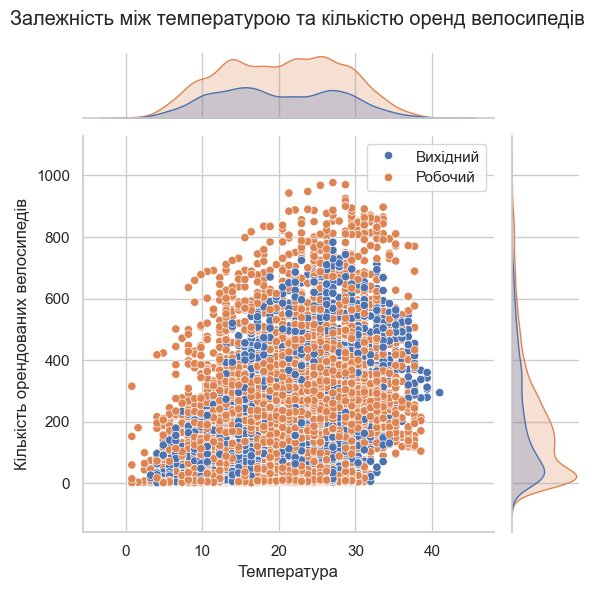

In [10]:
df['workingday_name'] = df['workingday'].map({0: 'Вихідний', 1: 'Робочий'})

g = sns.jointplot(
    data = df, 
    x='temp',
    y='count',
    hue='workingday_name'
    )
g.ax_joint.legend(title='')

plt.suptitle('Залежність між температурою та кількістю оренд велосипедів')
plt.xlabel('Температура')
plt.ylabel('Кількість орендованих велосипедів')
plt.tight_layout()
plt.show()

1) Графік по краях показують розподіли температури і кількості оренд залежно від типу дня - вижідний чи робочий. Так як робочих днів більше, то і розподіл графіків вище, а от форма розподілу схожа, як для температури так і для кількості оренд. Хоча, в робочі дні графік кількості оренд трохи товще на кількості приблизно 200, і розмах між мінімальною та максимальною кількістю для робочого дня вище.

2) В робочі дня кількість оренд загалом вище ніж в вихідні. В вихідні немає значнь вище за 800 на годину, а в робочі доходить до 1000. Нахил графіку у вихідні трохи більший, що означає більшу залежність від температури у вихідні дні, ніж в робочі. Наприклад за температури нижче 5 градусів у вихідні люди не їздять на велосипедах, але в робочі навіть на низької температури можуть обрати велосипед як засіб доїхати до роботи.